In [2]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv(r"C:\Users\Admin\Downloads\archive\spam.csv", encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.drop(['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)

In [7]:
df.columns=['label','message']

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.isna().sum()

label      0
message    0
dtype: int64

In [11]:
df.duplicated().sum()

403

In [12]:
df.drop_duplicates(inplace = True)

df.shape

(5169, 2)

In [13]:
df['label'].value_counts()

ham     4516
spam     653
Name: label, dtype: int64

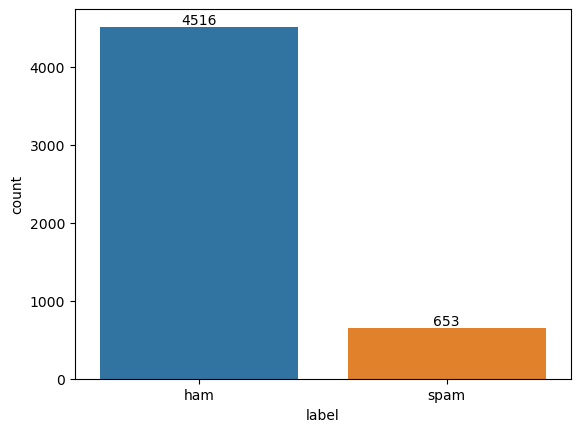

In [14]:
ax=sns.countplot(data=df,x='label')
for i in ax.containers:
    ax.bar_label(i)

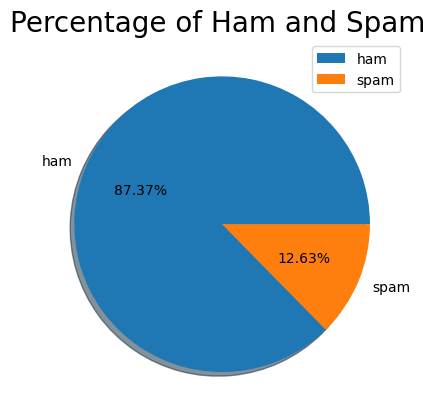

In [15]:
plt.pie(df.label.value_counts(),autopct="%1.2f%%",shadow=True,labels=df.label.unique());
plt.title('Percentage of Ham and Spam ',size=20)
plt.legend()
plt.show()

In [16]:
df['message']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 5169, dtype: object

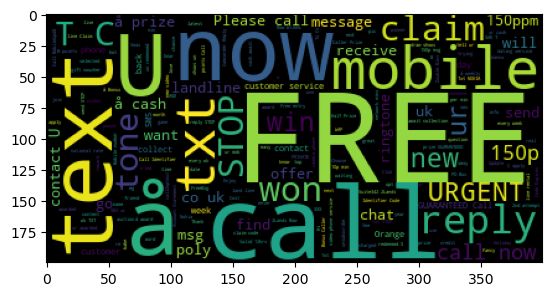

In [18]:
from wordcloud import WordCloud
wc=WordCloud()
wc.generate(" ".join((df[df['label']=="spam"]['message'])))
plt.imshow(wc)
plt.show()

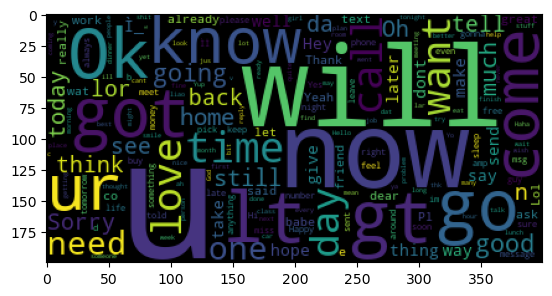

In [19]:
from wordcloud import WordCloud
wc=WordCloud()
wc.generate(" ".join((df[df['label']=="ham"]['message'])))
plt.imshow(wc)
plt.show()

In [20]:
str_null=[]
for indx,lbl,msg in df.itertuples():
    if type(msg)==str:
        if msg.isspace():
            str_null.append(indx)

In [21]:
str_null

[]

In [30]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download("punkt")
from nltk.corpus import stopwords
nltk.download("stopwords")
from nltk.stem import PorterStemmer,WordNetLemmatizer
nltk.download("wordnet")
import nltk
nltk.download('omw-1.4')

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>
[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>
[nltk_data] Error loading wordnet: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>
[nltk_data] Error loading omw-1.4: <urlopen error [WinE

False

In [31]:
def clean_sent(text):
    #tokenization and case conversion
    token=word_tokenize(text.lower())
    #token--->list of tokens
    #removing non alpha char
    ftoken=[i for i in token if i.isalpha()]
    #ftoken-----> list
    sw=stopwords.words("english")
    stokens=[i for i in ftoken if i not in sw]
    #stokens--->list
    #lemmatization
    lemma=WordNetLemmatizer()
    ltoken=[lemma.lemmatize(i) for i in stokens]
    #ltoken--->list
    #joining all tokens
    return " ".join(ltoken)